In [1]:
import time, os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from get_dataset import load_dataset
from get_dataset import get_trainset
from get_dataset import scaler_user
from embedding import embedding_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
created_time = int(time.time()) 
user, item, label = load_dataset()

rent = user[:,5].astype(np.float32)
body = user[:,6].astype(np.float32)
user = user[:,0:5].astype(np.float32)

id = item[:,0].astype(np.float32)
cat = item[:,1].astype(np.float32)
item = item[:,2].astype(np.float32)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 rent_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 body_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 cat_input (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 id_input (InputLayer)          [(None, 1)]          0           []                               
                                                                                              

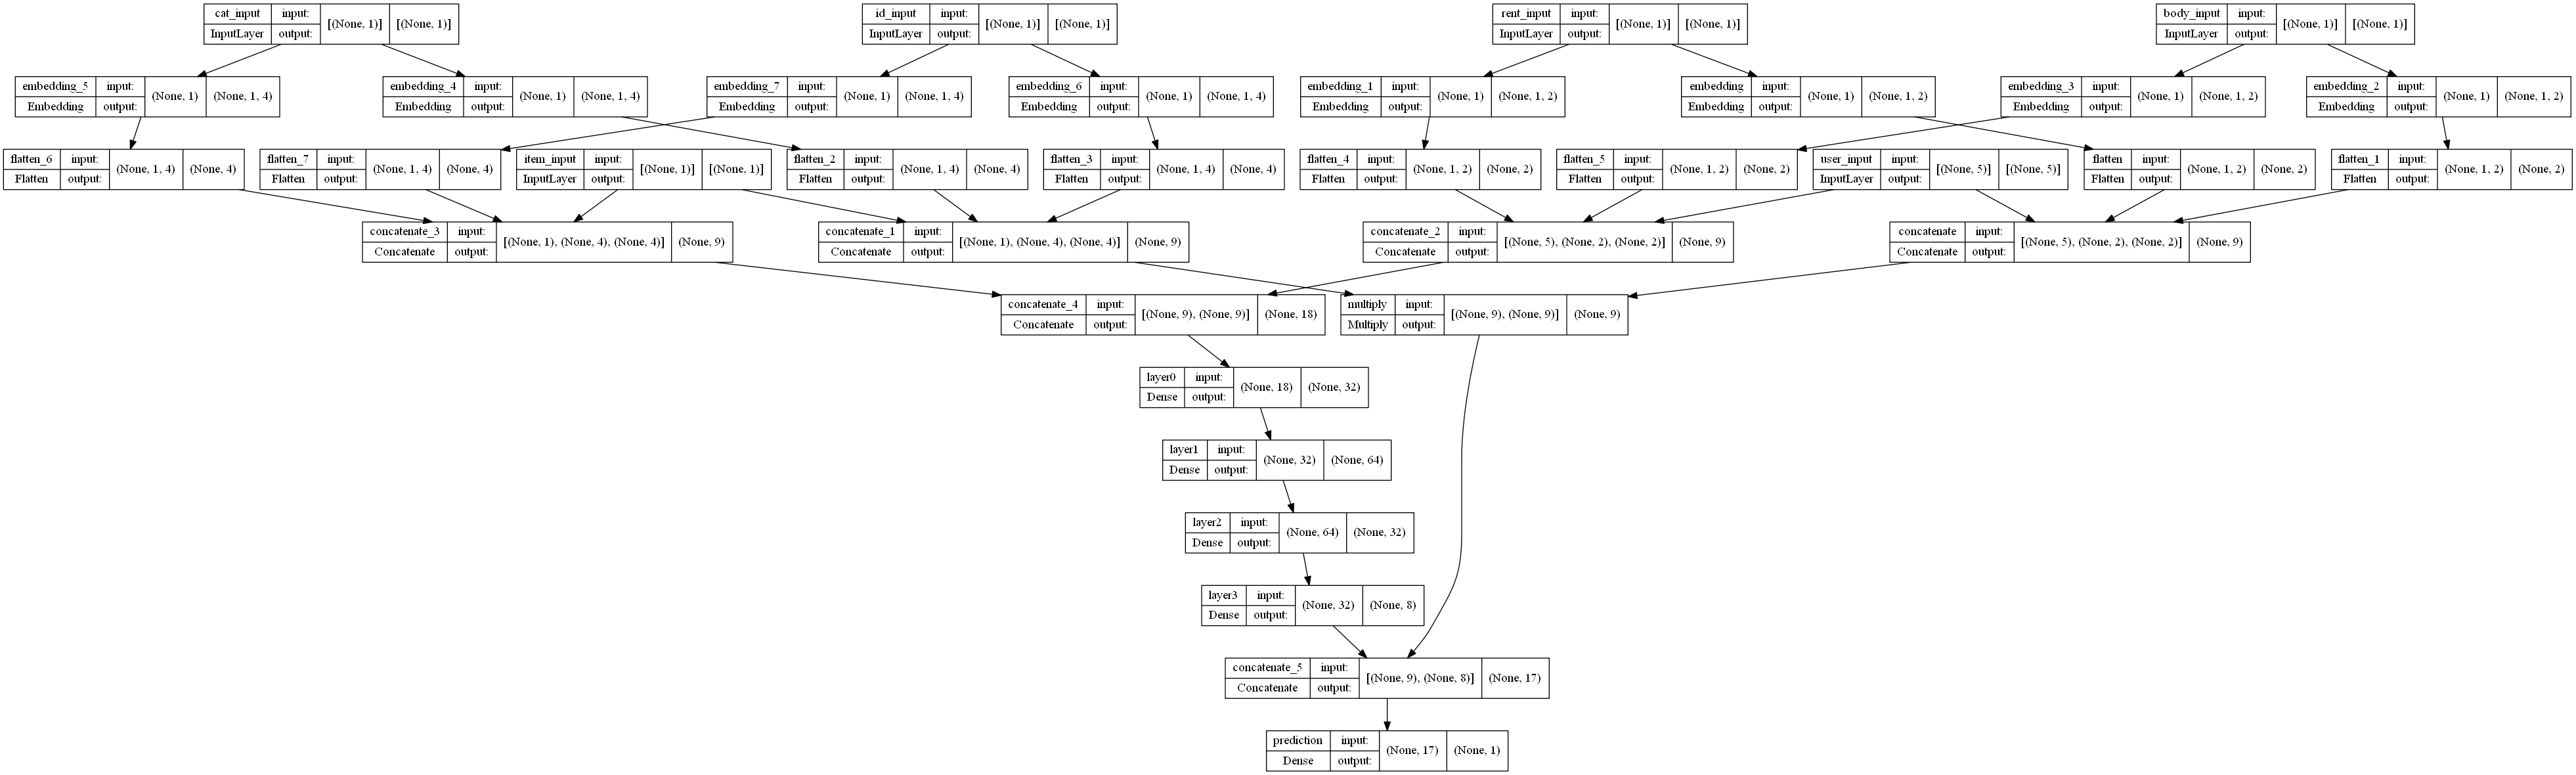

In [3]:
model = embedding_model()
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [4]:
user_train, user_val, rent_train, rent_val, body_train, body_val, item_train, item_val, cat_train, cat_val, id_train, id_val, label_train, label_val = train_test_split(user, rent, body, item, cat, id, label, test_size=0.1, random_state=2022)

print(np.shape(user_train))
print(np.shape(rent_train))
print(np.shape(body_train))
print(np.shape(item_train))
print(np.shape(cat_train))
print(np.shape(id_train))
print(np.shape(label_train[:,1]))

(173149, 5)
(173149,)
(173149,)
(173149,)
(173149,)
(173149,)
(173149,)


In [5]:
loss = 'mse'
model.compile(optimizer='adam', loss=loss, metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.AUC()])
history = model.fit([user_train, rent_train, body_train, id_train, cat_train, item_train], label_train[:,0], epochs=50, batch_size=32,validation_data=([user_val, rent_val, body_val, id_val, cat_val, item_val], label_val[:,0]))

os.mkdir(f"model/{loss}_{created_time}")
model.save(f'model/{loss}_{created_time}/chest_model.h5')

pd.Series(history.history['loss']).plot(logy=True)
pd.Series(history.history['val_loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("train Error")
plt.savefig(f"model/{loss}_{created_time}/train_error.png")
plt.show()


Epoch 1/50
